In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [2]:

raw_dataset = pd.read_csv('NY data summary lag 6.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features = raw_dataset.copy()

features.head(10)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,3/1/2005,204.075072,5.93,46445,18798.114,4.8,1096833.984,673.0543,32.90%,214701,0.90%,5852.065587,2.39,186.9
1,4/1/2005,206.680701,5.86,50442,18825.633,4.8,1152815.433,673.0543,32.90%,215976,0.80%,4700.094832,2.74,187.9
2,5/1/2005,209.323123,5.72,50442,18825.633,4.7,1152815.433,673.0543,32.90%,215976,0.80%,4978.336136,2.65,188.4
3,6/1/2005,212.054408,5.58,50442,18825.633,4.8,1152815.433,673.0543,32.90%,215976,0.80%,4541.492838,2.49,187.6
4,7/1/2005,213.506930,5.70,50442,18825.633,4.8,1152815.433,673.0543,32.70%,218751,0.90%,4545.705558,2.50,189.2
5,8/1/2005,215.056300,5.82,50442,18825.633,4.9,1152815.433,673.0543,32.70%,218751,0.90%,5644.986814,2.24,191.3
6,9/1/2005,215.719341,5.77,50442,18825.633,5.0,1152815.433,673.0543,32.70%,218751,0.90%,4939.945161,1.93,195.5
7,10/1/2005,216.433534,6.07,50442,18825.633,5.0,1152815.433,673.0543,32.50%,222198,0.90%,4275.704563,1.99,194.5
8,11/1/2005,216.619664,6.33,50442,18825.633,5.0,1152815.433,673.0543,32.50%,222198,0.90%,4456.121242,2.27,193.1
9,12/1/2005,216.195575,6.27,50442,18825.633,4.9,1152815.433,673.0543,32.50%,222198,0.90%,4594.430120,2.47,191.8


In [3]:
mort_debt = np.array(features['Percent_With_Mortgage_Debt'])
mdebt = []
for x in mort_debt:
  mdebt.append(float(x[:5]))
features = features.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt = np.array(features['Percent_With_Severely_Delinquent_Debt'])
ddebt = []
for x in del_debt:
  ddebt.append(float(x[:4]))
features = features.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features['Percent_With_Mortgage_Debt'] = mdebt
features['Percent_With_Severely_Delinquent_Debt'] = ddebt
features.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3/1/2005,204.075072,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.9,32.9,0.9
1,4/1/2005,206.680701,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.9,32.9,0.8
2,5/1/2005,209.323123,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.4,32.9,0.8
3,6/1/2005,212.054408,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.6,32.9,0.8
4,7/1/2005,213.506930,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.2,32.7,0.9


In [4]:
y= features.pop("House_Price_Index(S&P/Case-Shiller)")


In [5]:
X=features.drop('Date',axis=1)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,5.93,46445,18798.114,4.8,1096833.984,673.0543,214701,5852.065587,2.39,186.900,32.9,0.9
1,5.86,50442,18825.633,4.8,1152815.433,673.0543,215976,4700.094832,2.74,187.900,32.9,0.8
2,5.72,50442,18825.633,4.7,1152815.433,673.0543,215976,4978.336136,2.65,188.400,32.9,0.8
3,5.58,50442,18825.633,4.8,1152815.433,673.0543,215976,4541.492838,2.49,187.600,32.9,0.8
4,5.70,50442,18825.633,4.8,1152815.433,673.0543,218751,4545.705558,2.50,189.200,32.7,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...
143,4.17,76565,19276.644,4.5,1799148.324,538.8951,245031,4834.364431,2.33,228.898,28.4,2.9
144,4.20,76565,19276.644,4.4,1799148.324,538.8951,245031,4957.019871,2.56,228.609,28.4,2.9
145,4.05,76565,19276.644,4.5,1799148.324,538.8951,245422,2877.676720,2.69,228.849,28.4,2.6
146,4.01,76565,19276.644,4.5,1799148.324,538.8951,245422,5466.221827,2.80,228.984,28.4,2.6


In [6]:
train_stats = X.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),148.0,4.804324e+00,1.043601,3.350000e+00,3.935000e+00,4.475000e+00,5.920000e+00,6.760000e+00
Personal_Income,148.0,6.034877e+04,7267.809446,4.644500e+04,5.463200e+04,6.016000e+04,6.621200e+04,7.656500e+04
Resident_Population,148.0,1.912196e+04,174.549510,1.879811e+04,1.896850e+04,1.914969e+04,1.928093e+04,1.933478e+04
Unemployment_Rate,148.0,6.479730e+00,1.826448,4.200000e+00,4.800000e+00,5.900000e+00,8.525000e+00,9.300000e+00
GDP,148.0,1.401186e+06,192800.091062,1.096834e+06,1.225295e+06,1.401401e+06,1.576387e+06,1.799148e+06
Crime_Rate,148.0,6.031229e+02,34.354282,5.388951e+02,5.803423e+02,5.967001e+02,6.239068e+02,6.730543e+02
Median_Debt,148.0,2.438680e+05,8951.754192,2.147010e+05,2.443320e+05,2.457250e+05,2.493820e+05,2.531410e+05
New_Structures,148.0,3.454655e+03,2357.465715,1.017219e+03,1.869050e+03,3.234874e+03,4.390159e+03,1.751628e+04
Economic_Conditions_Index,148.0,2.342703e+00,1.375495,-3.190000e+00,2.337500e+00,2.745000e+00,3.050000e+00,4.050000e+00
CPI less shelter,148.0,2.147723e+02,12.927124,1.869000e+02,2.037358e+02,2.200615e+02,2.260182e+02,2.302770e+02


In [7]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X = norm(X)
X

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,1.078645,-1.913062,-1.855339,-0.919670,-1.578591,2.035594,-3.258248,1.016944,0.034386,-2.156111,0.468473,-1.511918
1,1.011570,-1.363103,-1.697681,-0.919670,-1.288231,2.035594,-3.115818,0.528296,0.288839,-2.078754,0.468473,-1.554226
2,0.877419,-1.363103,-1.697681,-0.974421,-1.288231,2.035594,-3.115818,0.646322,0.223408,-2.040076,0.468473,-1.554226
3,0.743268,-1.363103,-1.697681,-0.919670,-1.288231,2.035594,-3.115818,0.461020,0.107087,-2.101961,0.468473,-1.554226
4,0.858255,-1.363103,-1.697681,-0.919670,-1.288231,2.035594,-2.805823,0.462807,0.114357,-1.978190,0.362942,-1.511918
...,...,...,...,...,...,...,...,...,...,...,...,...
143,-0.607822,2.231240,0.886176,-1.083923,2.064117,-1.869573,0.129915,0.585251,-0.009235,1.092717,-1.905978,-0.665770
144,-0.579076,2.231240,0.886176,-1.138674,2.064117,-1.869573,0.129915,0.637280,0.157977,1.070361,-1.905978,-0.665770
145,-0.722809,2.231240,0.886176,-1.083923,2.064117,-1.869573,0.173593,-0.244745,0.252489,1.088927,-1.905978,-0.792692
146,-0.761138,2.231240,0.886176,-1.083923,2.064117,-1.869573,0.173593,0.853275,0.332460,1.099370,-1.905978,-0.792692


In [8]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [9]:
y_pred = regressor.predict(X)

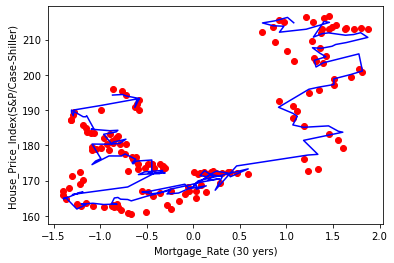

In [10]:
plt.scatter(X['Mortgage_Rate (30 yers)'], y, color = 'red')
plt.plot(X['Mortgage_Rate (30 yers)'], regressor.predict(X), color = 'blue')

plt.xlabel('Mortgage_Rate (30 yers)')
plt.ylabel('House_Price_Index(S&P/Case-Shiller)')
plt.show()

Mean Absolute Error: 1.96
Accuracy: 98.93 %.


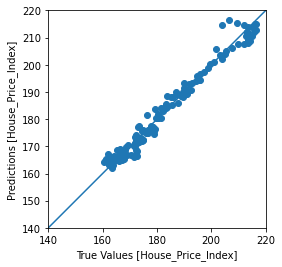

In [11]:
a = plt.axes(aspect='equal')
plt.scatter(y, y_pred)
plt.xlabel('True Values [House_Price_Index]')
plt.ylabel('Predictions [House_Price_Index]')
lims = [140, 220]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

errors = abs(y_pred - y)


print('Mean Absolute Error:', round(np.mean(errors), 2))

mape = np.mean(100 * (errors / y))
accuracy = 100 - mape
print('Accuracy:', round(accuracy, 2), '%.')

In [12]:
regressor.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [13]:
regressor.score(X, y, sample_weight=None) # Return the coefficient of determination r square of the prediction.

0.9745698252627869

In [14]:
coef=pd.DataFrame(regressor.coef_)
coef#get the coefficient for each term

,0
0,4.363335
1,3.016786
2,-1.731858
3,2.717881
4,0.290583
5,0.585840
6,-2.631957
7,0.360155
8,2.434365
9,-3.005246


In [15]:
coef.to_csv('coef-result.csv',index = False, header=True)

In [16]:
print(y_pred)

[214.80219814 216.31449253 215.34732711 214.74686267 213.94621649
 213.8163369  212.1233411  212.96693511 214.90258039 215.18022184
 210.72487921 211.71525478 211.9262559  211.26329172 211.45622549
 211.9775309  210.65189069 209.18865568 208.63670994 208.13909697
 207.56347748 207.71168044 206.21907199 205.15599434 204.13027347
 202.25697762 203.43230827 205.97450686 201.13639652 200.12821299
 198.89793882 197.2793613  196.54172452 195.94011544 190.83088865
 189.11793543 188.28461341 185.82124515 185.15049057 185.55369935
 184.02651086 183.76339582 181.44883041 177.48005528 177.28649645
 174.19280779 167.31167863 171.15139931 171.76334822 168.73301392
 169.95896467 173.36051319 171.12888691 172.19766877 172.70657895
 171.15642549 171.46547189 172.85750332 171.25521334 170.73636633
 170.1110776  170.56456355 169.59159169 168.65327299 167.66812129
 166.59942845 166.32630981 166.79094561 166.92719381 169.00881046
 167.74752495 168.54550721 167.58774167 168.74039124 166.5049442
 166.250783

In [17]:
Newy=pd.DataFrame(y_pred)
Newy.to_csv('y-pred.csv',index = False, header=True)
X.to_csv('X.csv',index = False, header=True)
Newy

,0
0,214.802198
1,216.314493
2,215.347327
3,214.746863
4,213.946216
...,...
143,192.836510
144,193.306114
145,194.064696
146,194.456207


In [18]:
X_transpose=X.transpose()

In [19]:
X_transpose

,0,1,2,3,4,5,6,7,8,9,...,138,139,140,141,142,143,144,145,146,147
Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,1.404440,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
Personal_Income,-1.913062,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,...,1.753517,1.753517,1.753517,1.753517,1.753517,2.231240,2.231240,2.231240,2.231240,2.231240
Resident_Population,-1.855339,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,...,1.149499,1.149499,1.149499,1.149499,1.149499,0.886176,0.886176,0.886176,0.886176,0.886176
Unemployment_Rate,-0.919670,-0.919670,-0.974421,-0.919670,-0.919670,-0.864919,-0.810168,-0.810168,-0.810168,-0.864919,...,-0.864919,-0.919670,-0.974421,-1.029172,-1.083923,-1.083923,-1.138674,-1.083923,-1.083923,-1.029172
GDP,-1.578591,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,...,1.549314,1.549314,1.549314,1.549314,1.549314,2.064117,2.064117,2.064117,2.064117,2.064117
Crime_Rate,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,...,-0.864746,-0.864746,-0.864746,-0.864746,-1.869573,-1.869573,-1.869573,-1.869573,-1.869573,-1.869573
Median_Debt,-3.258248,-3.115818,-3.115818,-3.115818,-2.805823,-2.805823,-2.805823,-2.420758,-2.420758,-2.420758,...,0.010609,0.065570,0.065570,0.065570,0.129915,0.129915,0.129915,0.173593,0.173593,0.173593
New_Structures,1.016944,0.528296,0.646322,0.461020,0.462807,0.929104,0.630037,0.348276,0.424806,0.483475,...,0.024416,0.226315,-0.016508,0.521338,-0.066875,0.585251,0.637280,-0.244745,0.853275,0.167739
Economic_Conditions_Index,0.034386,0.288839,0.223408,0.107087,0.114357,-0.074666,-0.300039,-0.256419,-0.052856,0.092547,...,0.128897,-0.154637,-0.052856,0.019845,0.019845,-0.009235,0.157977,0.252489,0.332460,0.528753
CPI less shelter,-2.156111,-2.078754,-2.040076,-2.101961,-1.978190,-1.815741,-1.490843,-1.568200,-1.676499,-1.777063,...,0.878362,0.838523,0.839451,0.856779,1.008708,1.092717,1.070361,1.088927,1.099370,1.127760


In [20]:
X_transpose=X_transpose.reset_index()

In [21]:
X_transpose

,index,0,1,2,3,4,5,6,7,8,...,138,139,140,141,142,143,144,145,146,147
0,Mortgage_Rate (30 yers),1.078645,1.011570,0.877419,0.743268,0.858255,0.973241,0.925330,1.212796,1.461934,...,-1.288159,-1.278577,-0.991111,-0.579076,-0.626987,-0.607822,-0.579076,-0.722809,-0.761138,-0.866542
1,Personal_Income,-1.913062,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,-1.363103,...,1.753517,1.753517,1.753517,1.753517,1.753517,2.231240,2.231240,2.231240,2.231240,2.231240
2,Resident_Population,-1.855339,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,-1.697681,...,1.149499,1.149499,1.149499,1.149499,1.149499,0.886176,0.886176,0.886176,0.886176,0.886176
3,Unemployment_Rate,-0.919670,-0.919670,-0.974421,-0.919670,-0.919670,-0.864919,-0.810168,-0.810168,-0.810168,...,-0.864919,-0.919670,-0.974421,-1.029172,-1.083923,-1.083923,-1.138674,-1.083923,-1.083923,-1.029172
4,GDP,-1.578591,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,-1.288231,...,1.549314,1.549314,1.549314,1.549314,1.549314,2.064117,2.064117,2.064117,2.064117,2.064117
5,Crime_Rate,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,2.035594,...,-0.864746,-0.864746,-0.864746,-0.864746,-1.869573,-1.869573,-1.869573,-1.869573,-1.869573,-1.869573
6,Median_Debt,-3.258248,-3.115818,-3.115818,-3.115818,-2.805823,-2.805823,-2.805823,-2.420758,-2.420758,...,0.010609,0.065570,0.065570,0.065570,0.129915,0.129915,0.129915,0.173593,0.173593,0.173593
7,New_Structures,1.016944,0.528296,0.646322,0.461020,0.462807,0.929104,0.630037,0.348276,0.424806,...,0.024416,0.226315,-0.016508,0.521338,-0.066875,0.585251,0.637280,-0.244745,0.853275,0.167739
8,Economic_Conditions_Index,0.034386,0.288839,0.223408,0.107087,0.114357,-0.074666,-0.300039,-0.256419,-0.052856,...,0.128897,-0.154637,-0.052856,0.019845,0.019845,-0.009235,0.157977,0.252489,0.332460,0.528753
9,CPI less shelter,-2.156111,-2.078754,-2.040076,-2.101961,-1.978190,-1.815741,-1.490843,-1.568200,-1.676499,...,0.878362,0.838523,0.839451,0.856779,1.008708,1.092717,1.070361,1.088927,1.099370,1.127760


In [22]:
X_transpose_index=X_transpose[['index']]

In [23]:
X_transpose_index

,index
0,Mortgage_Rate (30 yers)
1,Personal_Income
2,Resident_Population
3,Unemployment_Rate
4,GDP
5,Crime_Rate
6,Median_Debt
7,New_Structures
8,Economic_Conditions_Index
9,CPI less shelter


In [24]:
X_transpose_index=X_transpose_index.join(coef)

In [25]:
X_transpose_index

,index,0
0,Mortgage_Rate (30 yers),4.363335
1,Personal_Income,3.016786
2,Resident_Population,-1.731858
3,Unemployment_Rate,2.717881
4,GDP,0.290583
5,Crime_Rate,0.585840
6,Median_Debt,-2.631957
7,New_Structures,0.360155
8,Economic_Conditions_Index,2.434365
9,CPI less shelter,-3.005246


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

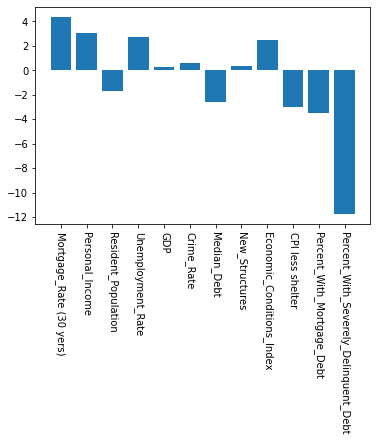

In [26]:
plt.bar(X_transpose_index['index'],X_transpose_index[0])
plt.xticks(rotation=270)

In [27]:
raw_dataset_2 = pd.read_csv('2018 prediction.csv',
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)

features_2 = raw_dataset_2.copy()

features_2.head(14)

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Percent_With_Mortgage_Debt,Median_Debt,Percent_With_Severely_Delinquent_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter
0,7/1/2017,190.840081,3.97,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,4010.836341,3.04,228.127
1,8/1/2017,191.882768,3.88,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,3118.553708,2.92,228.207
2,9/1/2017,192.949840,3.81,76565,19276.644,4.6,1799148.324,538.8951,28.00%,245631,2.50%,2928.686450,2.79,230.219
3,10/1/2017,194.414177,3.90,76565,19276.644,4.5,1799148.324,538.8951,27.70%,245359,2.40%,3500.473181,2.54,229.361
4,11/1/2017,195.324362,3.92,76565,19276.644,4.5,1799148.324,538.8951,27.70%,245359,2.40%,3968.326158,2.71,228.960
5,12/1/2017,195.944311,3.95,76565,19276.644,4.4,1799148.324,538.8951,27.70%,245359,2.40%,3379.406569,2.81,228.871
6,1/1/2018,196.665120,4.03,76565,19276.644,4.3,1799148.324,541.0310,28.10%,244424,2.20%,4598.873831,2.90,230.297
7,2/1/2018,197.782954,4.33,79844,19216.182,4.3,1861147.410,541.0310,28.10%,244424,2.20%,4467.467264,2.94,232.256
8,3/1/2018,198.120734,4.44,79844,19216.182,4.2,1861147.410,541.0310,28.10%,244424,2.20%,3745.519561,2.77,231.599
9,4/1/2018,197.723899,4.47,79844,19216.182,4.1,1861147.410,541.0310,27.60%,244131,2.00%,4214.956696,2.72,232.455


In [28]:
mort_debt_2 = np.array(features_2['Percent_With_Mortgage_Debt'])
mdebt_2 = []
for x in mort_debt_2:
  mdebt_2.append(float(x[:5]))
features_2 = features_2.drop('Percent_With_Mortgage_Debt',axis=1)

del_debt_2 = np.array(features_2['Percent_With_Severely_Delinquent_Debt'])
ddebt_2 = []
for x in del_debt_2:
  ddebt_2.append(float(x[:4]))
features_2 = features_2.drop('Percent_With_Severely_Delinquent_Debt',axis=1)

features_2['Percent_With_Mortgage_Debt'] = mdebt_2
features_2['Percent_With_Severely_Delinquent_Debt'] = ddebt_2
features_2.head()

,Date,House_Price_Index(S&P/Case-Shiller),Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,7/1/2017,190.840081,3.97,76565,19276.644,4.6,1799148.324,538.8951,245631,4010.836341,3.04,228.127,28.0,2.5
1,8/1/2017,191.882768,3.88,76565,19276.644,4.6,1799148.324,538.8951,245631,3118.553708,2.92,228.207,28.0,2.5
2,9/1/2017,192.949840,3.81,76565,19276.644,4.6,1799148.324,538.8951,245631,2928.686450,2.79,230.219,28.0,2.5
3,10/1/2017,194.414177,3.90,76565,19276.644,4.5,1799148.324,538.8951,245359,3500.473181,2.54,229.361,27.7,2.4
4,11/1/2017,195.324362,3.92,76565,19276.644,4.5,1799148.324,538.8951,245359,3968.326158,2.71,228.960,27.7,2.4


In [29]:
y_2= features_2.pop("House_Price_Index(S&P/Case-Shiller)")
X_2=features_2.drop('Date',axis=1)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,3.97,76565,19276.644,4.6,1799148.324,538.8951,245631,4010.836341,3.04,228.127,28.0,2.5
1,3.88,76565,19276.644,4.6,1799148.324,538.8951,245631,3118.553708,2.92,228.207,28.0,2.5
2,3.81,76565,19276.644,4.6,1799148.324,538.8951,245631,2928.686450,2.79,230.219,28.0,2.5
3,3.90,76565,19276.644,4.5,1799148.324,538.8951,245359,3500.473181,2.54,229.361,27.7,2.4
4,3.92,76565,19276.644,4.5,1799148.324,538.8951,245359,3968.326158,2.71,228.960,27.7,2.4
5,3.95,76565,19276.644,4.4,1799148.324,538.8951,245359,3379.406569,2.81,228.871,27.7,2.4
6,4.03,76565,19276.644,4.3,1799148.324,541.0310,244424,4598.873831,2.90,230.297,28.1,2.2
7,4.33,79844,19216.182,4.3,1861147.410,541.0310,244424,4467.467264,2.94,232.256,28.1,2.2
8,4.44,79844,19216.182,4.2,1861147.410,541.0310,244424,3745.519561,2.77,231.599,28.1,2.2
9,4.47,79844,19216.182,4.1,1861147.410,541.0310,244131,4214.956696,2.72,232.455,27.6,2.0


In [30]:
train_stats_2 = X_2.describe()
train_stats_2 = train_stats_2.transpose()
train_stats_2

,count,mean,std,min,25%,50%,75%,max
Mortgage_Rate (30 yers),12.0,4.155000e+00,0.298374,3.810000e+00,3.915000e+00,4.000000e+00,4.447500e+00,4.590000e+00
Personal_Income,12.0,7.793125e+04,1688.451045,7.656500e+04,7.656500e+04,7.656500e+04,7.984400e+04,7.984400e+04
Resident_Population,12.0,1.925145e+04,31.133616,1.921618e+04,1.921618e+04,1.927664e+04,1.927664e+04,1.927664e+04
Unemployment_Rate,12.0,4.350000e+00,0.215322,4.000000e+00,4.175000e+00,4.350000e+00,4.525000e+00,4.600000e+00
GDP,12.0,1.824981e+06,31925.105689,1.799148e+06,1.799148e+06,1.799148e+06,1.861147e+06,1.861147e+06
Crime_Rate,12.0,5.399630e+02,1.115437,5.388951e+02,5.388951e+02,5.399630e+02,5.410310e+02,5.410310e+02
Median_Debt,12.0,2.448862e+05,652.733292,2.441310e+05,2.443508e+05,2.448915e+05,2.454270e+05,2.456310e+05
New_Structures,12.0,3.790823e+03,513.563535,2.928686e+03,3.470207e+03,3.856923e+03,4.061866e+03,4.598874e+03
Economic_Conditions_Index,12.0,2.784167e+00,0.148413,2.540000e+00,2.705000e+00,2.780000e+00,2.905000e+00,3.040000e+00
CPI less shelter,12.0,2.306774e+02,2.091256,2.281270e+02,2.289377e+02,2.302580e+02,2.323057e+02,2.340830e+02


In [31]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
X_2 = norm(X_2)
X_2

,Mortgage_Rate (30 yers),Personal_Income,Resident_Population,Unemployment_Rate,GDP,Crime_Rate,Median_Debt,New_Structures,Economic_Conditions_Index,CPI less shelter,Percent_With_Mortgage_Debt,Percent_With_Severely_Delinquent_Debt
0,-0.799467,2.231240,0.886176,-1.029172,2.064117,-1.869573,0.196941,0.235923,0.506943,1.033075,-2.117041,-0.835000
1,-0.885706,2.231240,0.886176,-1.029172,2.064117,-1.869573,0.196941,-0.142569,0.419701,1.039264,-2.117041,-0.835000
2,-0.952782,2.231240,0.886176,-1.029172,2.064117,-1.869573,0.196941,-0.223108,0.325190,1.194905,-2.117041,-0.835000
3,-0.866542,2.231240,0.886176,-1.083923,2.064117,-1.869573,0.166556,0.019435,0.143437,1.128533,-2.275337,-0.877307
4,-0.847378,2.231240,0.886176,-1.083923,2.064117,-1.869573,0.166556,0.217891,0.267029,1.097513,-2.275337,-0.877307
5,-0.818631,2.231240,0.886176,-1.138674,2.064117,-1.869573,0.166556,-0.031919,0.339730,1.090628,-2.275337,-0.877307
6,-0.741973,2.231240,0.886176,-1.193425,2.064117,-1.807400,0.062107,0.485360,0.405161,1.200939,-2.064275,-0.961922
7,-0.454507,2.682408,0.539787,-1.193425,2.385689,-1.807400,0.062107,0.429619,0.434242,1.352481,-2.064275,-0.961922
8,-0.349103,2.682408,0.539787,-1.248177,2.385689,-1.807400,0.062107,0.123380,0.310650,1.301658,-2.064275,-0.961922
9,-0.320356,2.682408,0.539787,-1.302928,2.385689,-1.807400,0.029376,0.322508,0.274299,1.367875,-2.328103,-1.046537


In [32]:
y_pred_2 = regressor.predict(X_2)


In [33]:
print(y_pred_2)

[196.00752865 195.26394431 194.24444838 195.44304914 195.99223528
 196.07656045 196.85335094 199.75737408 199.8100568  201.56782498
 201.63126842 201.1746356 ]


In [34]:
Newy_2=pd.DataFrame(y_pred_2)
Newy_2.to_csv('y-verify.csv',index = False, header=True)
Newy_2

,0
0,196.007529
1,195.263944
2,194.244448
3,195.443049
4,195.992235
5,196.076560
6,196.853351
7,199.757374
8,199.810057
9,201.567825
